In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
# 데이터 가져오기
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
# 데이터 확인
train_df.shape, test_df.shape

# train에는 10000개의 데이터가 있고, test에는 2062개의 데이터가 있다.
# train에는 18개의 컬럼이 있고, test에는 17개의 컬럼이 있다.

((10000, 18), (2062, 17))

In [4]:
# 컬럼 확인
train_df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [5]:
test_df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

In [6]:
# 예측해야할 컬럼 '채무 불이행 여부'
train_target = train_df['채무 불이행 여부']

In [7]:
# 채무 불이행 여부 데이터 비율
train_target[train_target == 0].count() / len(train_target), train_target[train_target == 1].count() / len(train_target)

(np.float64(0.6588), np.float64(0.3412))

In [8]:
# 채무 불이행 여부 0: 0.6588, 1:0.3412
# 약 2:1 비율. 균형 잡힌 데이터라고 할 수는 없지만, 극단적으로 불균형한 데이터도 아님
# 이 정도의 비율 차이는 비교적 수용 가능한 수준으로 간주

In [9]:
# 데이터셋 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [10]:
# 모든값 결측치 없음

In [11]:
train_df.head(10)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
5,TRAIN_00005,주택 담보 대출 (거주 중),5395734.0,10년 이상,1.0,12,35.6,1297161.0,2,33,0,부채 통합,단기 상환,562845.0,545880.0,23272.5,691,1
6,TRAIN_00006,자가,1601410.5,8년,0.0,17,32.6,1174611.0,1,74,3,부채 통합,단기 상환,252634.5,235188.0,3751.5,795,1
7,TRAIN_00007,주택 담보 대출 (거주 중),1410700.5,2년,0.0,8,24.4,692352.0,0,19,0,자동차 구매,장기 상환,479349.0,154974.0,16842.0,807,0
8,TRAIN_00008,주택 담보 대출 (거주 중),1636863.0,3년,0.0,9,9.8,154429.5,0,11,0,기타,단기 상환,370210.5,11943.0,28818.0,713,1
9,TRAIN_00009,자가,1644226.5,2년,0.0,6,12.7,511518.0,0,29,0,부채 통합,단기 상환,187140.0,122344.5,5214.0,793,0


In [12]:
# 수치형 데이터 분리
train_df_num = train_df.select_dtypes(include=np.number)

train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   연간 소득              10000 non-null  float64
 1   체납 세금 압류 횟수        10000 non-null  float64
 2   개설된 신용계좌 수         10000 non-null  int64  
 3   신용 거래 연수           10000 non-null  float64
 4   최대 신용한도            10000 non-null  float64
 5   신용 문제 발생 횟수        10000 non-null  int64  
 6   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 7   개인 파산 횟수           10000 non-null  int64  
 8   현재 대출 잔액           10000 non-null  float64
 9   현재 미상환 신용액         10000 non-null  float64
 10  월 상환 부채액           10000 non-null  float64
 11  신용 점수              10000 non-null  int64  
 12  채무 불이행 여부          10000 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [13]:
# 수치형 데이터 정보
train_df_num.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [14]:
# 확인이 필요한 컬럼
# 체납 세금 압류 횟수 75% 0 
# 신용 문제 발생 횟수 50% 0, 75% 1
# 개인 파산 횟수 75% 0

In [15]:
# '체납 세금 압류 횟수' 데이터 정보
train_df_num['체납 세금 압류 횟수'].value_counts()

체납 세금 압류 횟수
0.0    8826
1.0     884
4.0     176
2.0      60
5.0      37
7.0      10
3.0       4
6.0       3
Name: count, dtype: int64

In [16]:
# 체납 세금 압류 횟수 비율
train_df_num['체납 세금 압류 횟수'].value_counts() / len(train_df_num)

체납 세금 압류 횟수
0.0    0.8826
1.0    0.0884
4.0    0.0176
2.0    0.0060
5.0    0.0037
7.0    0.0010
3.0    0.0004
6.0    0.0003
Name: count, dtype: float64

In [17]:
# 체납 세금 압류 횟수 0의 비율이 0.8826, 그 이외의 비율 0.1174
# 0이면 0, 1이상이면 1 로 변경

In [18]:
# 신용 문제 발생 횟수 비율
train_df_num['신용 문제 발생 횟수'].value_counts() / len(train_df_num)

신용 문제 발생 횟수
0    0.6621
1    0.2149
2    0.0689
5    0.0248
6    0.0157
4    0.0093
3    0.0030
7    0.0013
Name: count, dtype: float64

In [19]:
# 신용 문제 발생 횟수 0의 비율 0.6621, 1의 비율 0.2149, 그 이외의 비율 0.123
# 0이면 0, 1이면 1, 2이상이면 2 변경


In [20]:
# 개인 파산 횟수 비율
train_df_num['개인 파산 횟수'].value_counts() / len(train_df_num)

개인 파산 횟수
0    0.7886
1    0.1268
3    0.0772
2    0.0074
Name: count, dtype: float64

In [21]:
# 개인 파산 횟수 0의 비율 0.7886, 1의 비율 0.1268, 그 이외의 비율 0.0846
# 0이면 0, 1이면 1, 2이상이면 2 변경

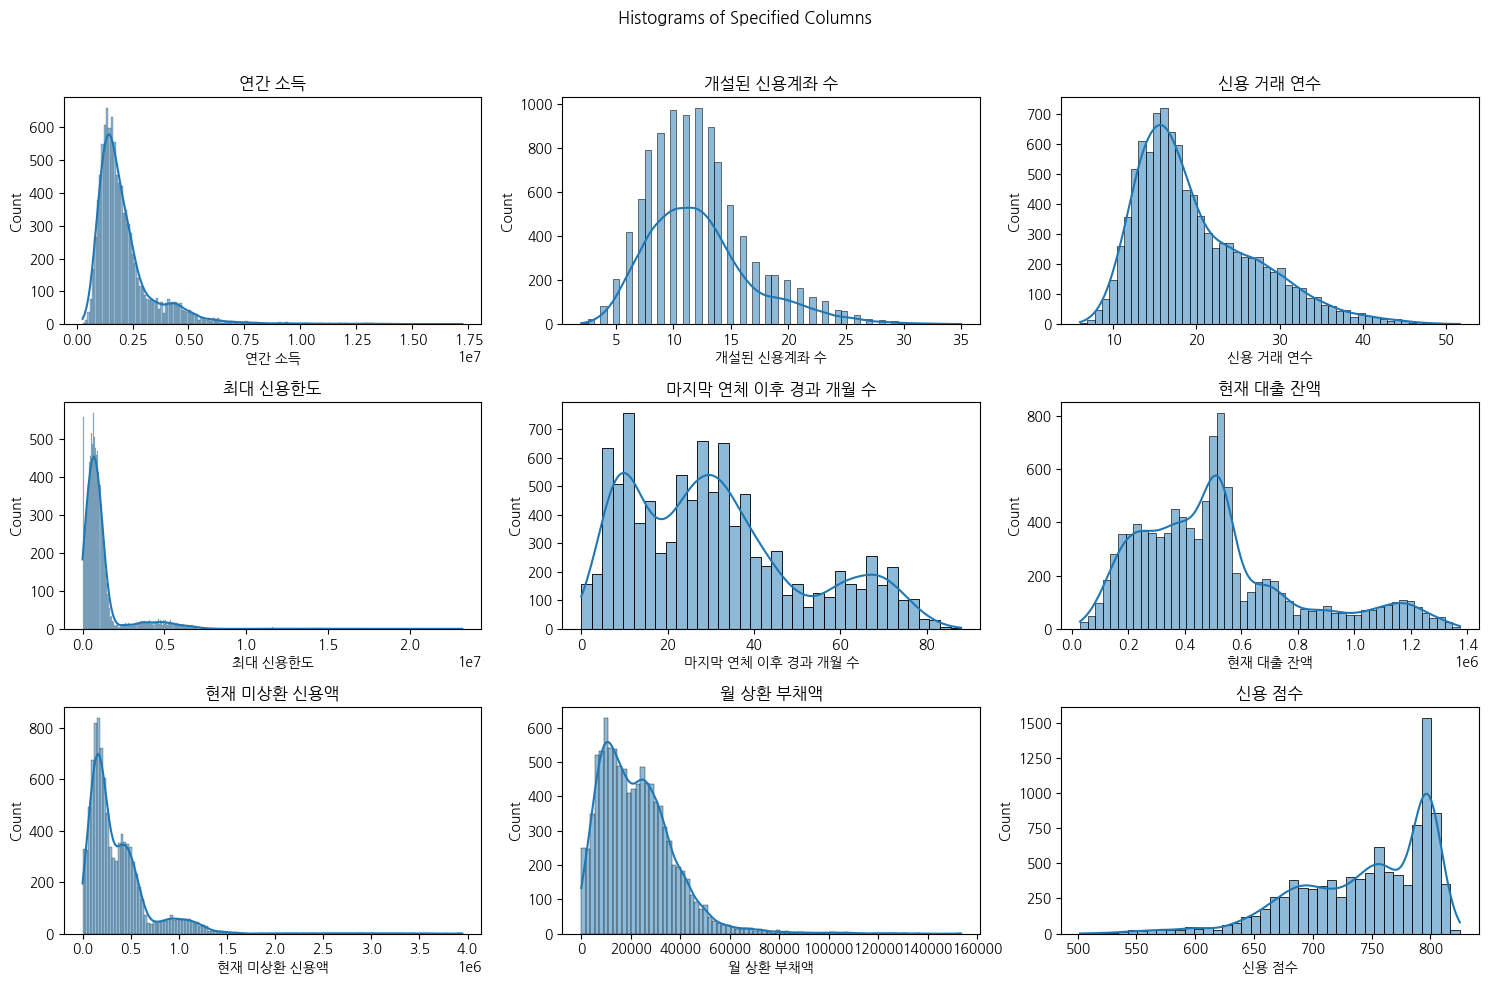

In [22]:
# 나머지 수치형 데이터 시각화

columns = [
    '연간 소득', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
    '마지막 연체 이후 경과 개월 수', '현재 대출 잔액', '현재 미상환 신용액',
    '월 상환 부채액', '신용 점수'
]

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df_num[column], kde=True)
    plt.title(column)

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [23]:
# 모든 데이터 비대칭적이다.
# 모든 데이터 Transfomation -> Scaling 작업 필요
# Transform 방법, Scaling 방법 여러가지 경우의 수

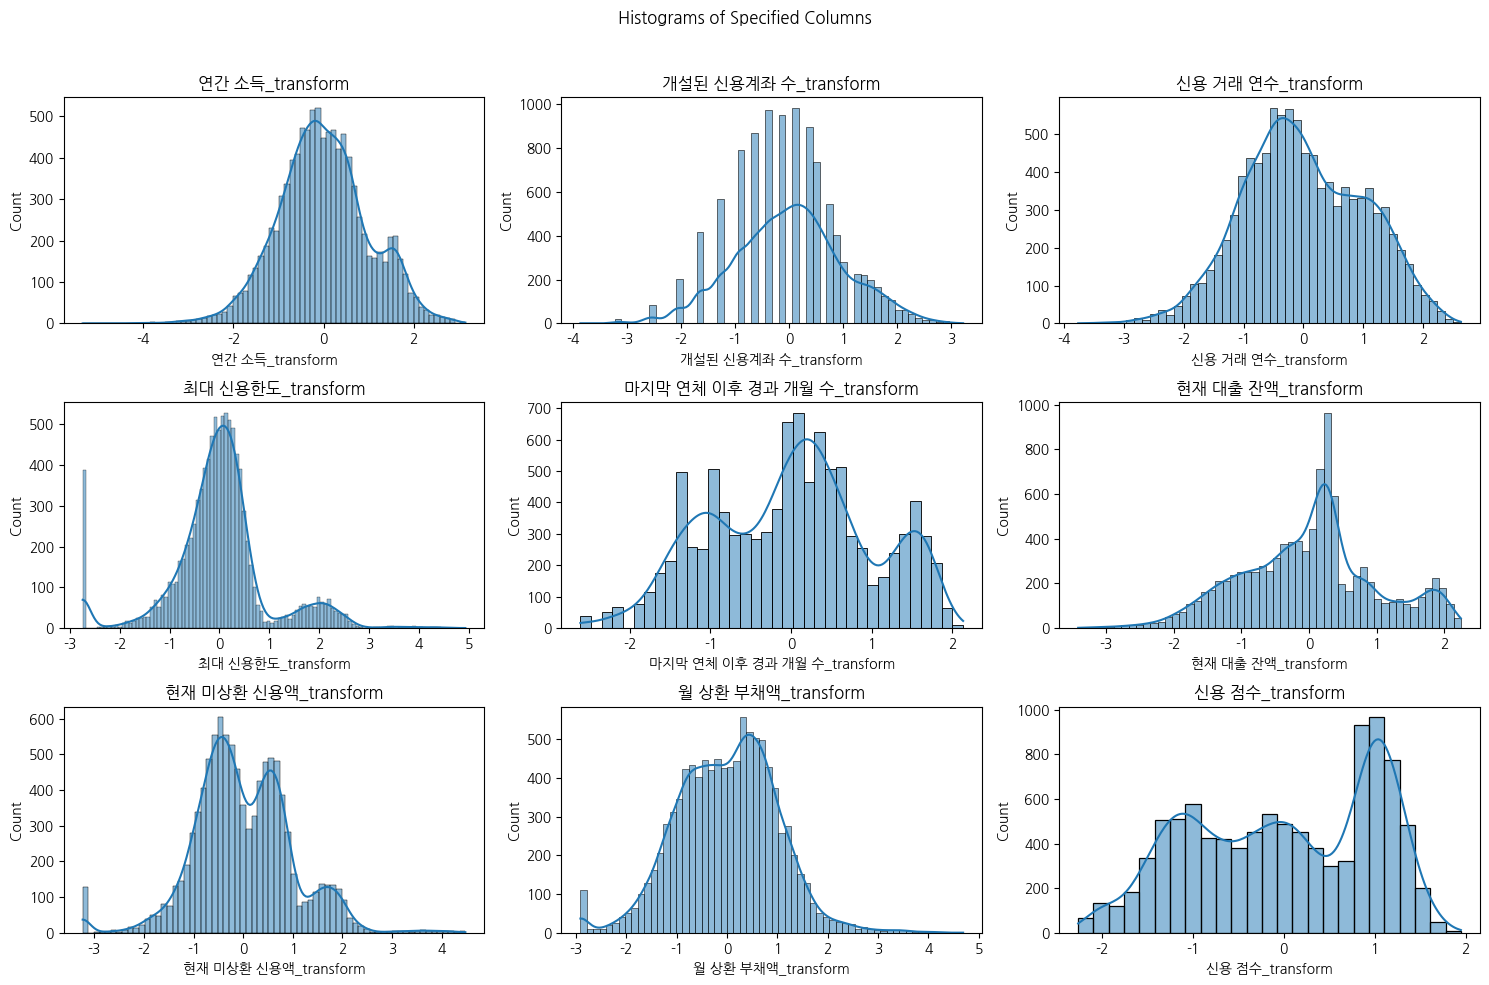

In [24]:
# PowerTransformer yeo-johnson 적용
from sklearn.preprocessing import PowerTransformer
transfomer = PowerTransformer(method='yeo-johnson')

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    train_df_num[column + '_transform'] = transfomer.fit_transform(train_df_num[[column]])
    plt.subplot(3, 3, i)
    sns.histplot(train_df_num[column + '_transform'], kde=True)
    plt.title(column + '_transform')

plt.suptitle('Histograms of Specified Columns')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [25]:
# Power Transformer 적용 후 이상치 비율 

outlier_counts = {}


for column in columns:
    Q1 = train_df_num[column + '_transform'].quantile(0.25)
    Q3 = train_df_num[column + '_transform'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df_num[(train_df_num[column + '_transform'] < lower_bound) | (train_df_num[column + '_transform'] > upper_bound)]
    outlier_counts[column + '_transform'] = outliers.shape[0]

print("이상치 개수:")
print()

for column, count in outlier_counts.items():
    print(f"{column}: {count} 개")
    print(f'비율: {count/10000}')
    print()

이상치 개수:

연간 소득_transform: 145 개
비율: 0.0145

개설된 신용계좌 수_transform: 38 개
비율: 0.0038

신용 거래 연수_transform: 13 개
비율: 0.0013

최대 신용한도_transform: 1397 개
비율: 0.1397

마지막 연체 이후 경과 개월 수_transform: 0 개
비율: 0.0

현재 대출 잔액_transform: 72 개
비율: 0.0072

현재 미상환 신용액_transform: 221 개
비율: 0.0221

월 상환 부채액_transform: 173 개
비율: 0.0173

신용 점수_transform: 0 개
비율: 0.0



In [26]:
# 사용할 이상치: 최대 신용한도
# 최대 신용한도_is_outlier 생성 후 표시
# 원래 컬럼의 이상치를 중앙값으로 대체체

# 나머지 이상치들은 비율이 매우 적기 때문에 삭제해도 무방하다.
# 이상치 버릴거: 연간 소득, 개설된 신용계좌 수, 신용 거래 연수, 마지막 연체 이후 경과 개월 수, 현재 대출 잔액, 현재 미상환 신용액, 월 상환 부채액, 신용 점수

In [27]:
# 이후 스케일링 작업 (MinMax 스케일링)

<Axes: >

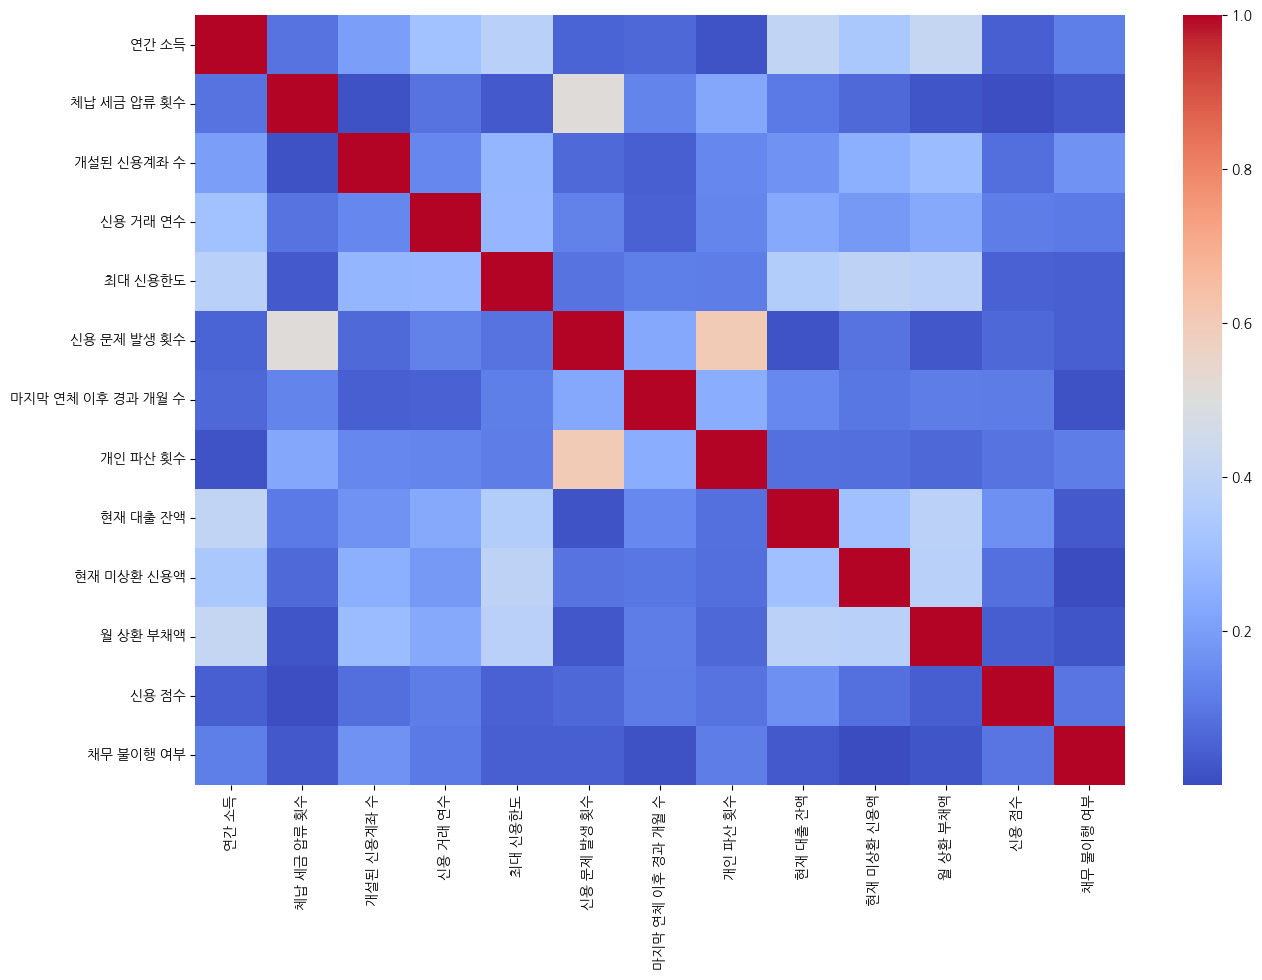

In [28]:
# 상관관계
train_df_corr = abs(train_df.select_dtypes(include=np.number).corr())
plt.figure(figsize=(15,10))
sns.heatmap(train_df_corr, cmap='coolwarm')

In [29]:
# 다중공선성 문제가 발생할 수 있는 변수들이 없음

In [30]:
# 수치형 아닌 데이터 분리
train_df_obj = train_df.select_dtypes(exclude=np.number)

train_df_obj.head(10)

,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간
0,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환
1,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환
2,TRAIN_00002,월세,4년,부채 통합,단기 상환
3,TRAIN_00003,월세,6년,부채 통합,단기 상환
4,TRAIN_00004,월세,2년,부채 통합,장기 상환
5,TRAIN_00005,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환
6,TRAIN_00006,자가,8년,부채 통합,단기 상환
7,TRAIN_00007,주택 담보 대출 (거주 중),2년,자동차 구매,장기 상환
8,TRAIN_00008,주택 담보 대출 (거주 중),3년,기타,단기 상환
9,TRAIN_00009,자가,2년,부채 통합,단기 상환


In [31]:
train_df_obj.describe()

,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간
count,10000,10000,10000,10000,10000
unique,10000,4,11,14,2
top,TRAIN_09983,월세,10년 이상,부채 통합,단기 상환
freq,1,4050,3828,7294,6975


In [32]:
# UID는 피쳐가 아님

In [33]:
# 주거 형태 정보
train_df_obj['주거 형태'].value_counts()

주거 형태
월세                  4050
주택 담보 대출 (거주 중)     3633
자가                  2241
주택 담보 대출 (비거주 중)      76
Name: count, dtype: int64

In [34]:
# 주거 형태 데이터 비율
train_df_obj['주거 형태'].value_counts() / len(train_df_obj)

주거 형태
월세                  0.4050
주택 담보 대출 (거주 중)     0.3633
자가                  0.2241
주택 담보 대출 (비거주 중)    0.0076
Name: count, dtype: float64

In [35]:
# '주거 형태'는 범주 명목형 데이터 -> one hot 인코딩
# 주택 담보 대출 (비거주 중) 데이터 매우 불충분 -> 피쳐 삭제


In [36]:
train_df_obj['현재 직장 근속 연수'].value_counts()

현재 직장 근속 연수
10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
1년 미만      488
6년         357
9년         268
Name: count, dtype: int64

In [37]:
# '현재 직장 근속 연수' 데이터 비율
train_df_obj['현재 직장 근속 연수'].value_counts() / len(train_df_obj)

현재 직장 근속 연수
10년 이상    0.3828
2년        0.1225
8년        0.0841
5년        0.0729
7년        0.0619
1년        0.0581
4년        0.0541
3년        0.0523
1년 미만     0.0488
6년        0.0357
9년        0.0268
Name: count, dtype: float64

<Axes: xlabel='현재 직장 근속 연수', ylabel='Count'>

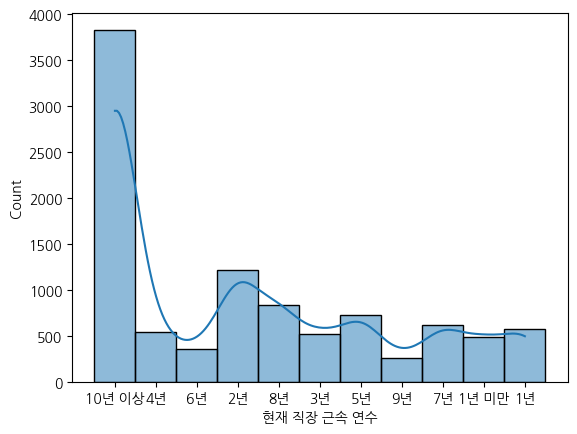

In [38]:
sns.histplot(train_df_obj['현재 직장 근속 연수'], kde=True)

In [39]:
# '현재 직장 근속 연수'는 범주 순서형 데이터 -> 라벨 인코딩
# 10년 이상 데이터가 다수, 나머지 데이터 비율은 비슷 



In [45]:
# 대출 목적 데이터 비율
train_df_obj['대출 목적'].value_counts() / len(train_df_obj)

대출 목적
부채 통합        0.7294
기타           0.0970
주택 개보수       0.0909
사업 대출        0.0254
여행 자금        0.0173
의료비          0.0158
자동차 구매       0.0095
고액 구매        0.0068
소규모 사업 자금    0.0026
주택 구매        0.0026
결혼 자금        0.0014
휴가 비용        0.0006
이사 비용        0.0004
교육비          0.0003
Name: count, dtype: float64

In [47]:
train_df_obj['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용'],
      dtype=object)

<Axes: xlabel='대출 목적', ylabel='Count'>

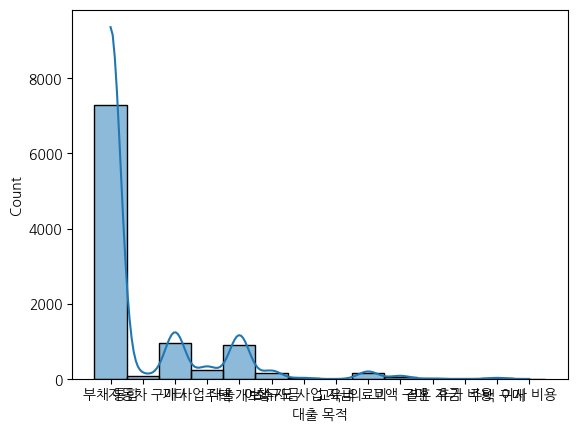

In [41]:
sns.histplot(train_df_obj['대출 목적'], kde=True)

In [42]:
# 대출 목적 부채통합의 비율 0.7294, 그 이외의 비율 0.2706
# 부채통합이면 1, 아니면 0 범주 명목형 데이터 커스텀 피쳐 추가


In [43]:
# 대출 상환 기간 데이터 비율
train_df_obj['대출 상환 기간'].value_counts() / len(train_df_obj)

대출 상환 기간
단기 상환    0.6975
장기 상환    0.3025
Name: count, dtype: float64

In [44]:
# 대출 상환 데이터는 범주 명목형 데이터